# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
# import data 
data = pd.read_csv('../data/boston_data.csv')

# no missing values
data.isna().sum()

# removing outliers 
z = stats.zscore(data)
data_clean = data[(z < 3).all(axis=1)]

# print result 
data_clean.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [3]:
# Your plots here
# sns.heatmap(data_clean.corr());
corr_medv = data_clean.corr().medv.sort_values().reset_index()
colnames = ["features", "corr_with_medv"]
corr_medv.columns = colnames

corr_medv_select = corr_medv[(corr_medv.corr_with_medv > 0.6) | (corr_medv.corr_with_medv < -0.6)]

# features with correlation > +/- 0.6 
corr_medv_select

,features,corr_with_medv
0,lstat,-0.772343
11,rm,0.616683
12,medv,1.000000


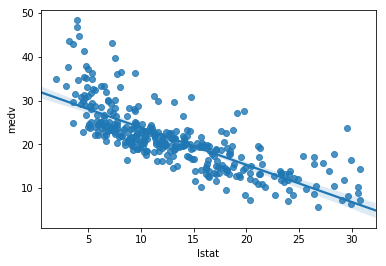

In [4]:
sns.regplot(x="lstat", y="medv", data=data_clean);

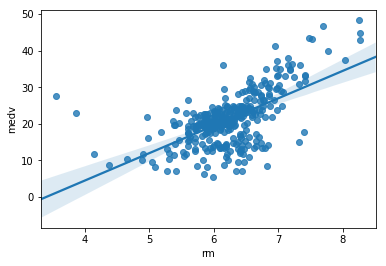

In [5]:
sns.regplot(x="rm", y="medv", data=data_clean);

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [6]:
# Your response here
# Yes I would have expected those relations when looking to the correlations 
# lstat has a strong negative relationship wit medv (the higher lstat, the lower mdev)
# rm has a strong positive relationship wit medv (the higher rm, the higher mdev)

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

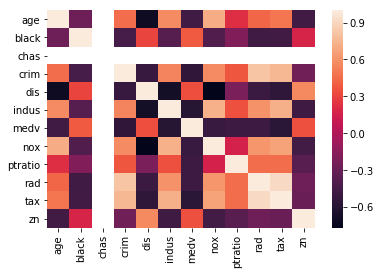

In [7]:
# Your response here
data_remain = data_clean[data_clean.columns.difference(['lstat','rm'])]
sns.heatmap(data_remain.corr()); 

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [8]:
# Your code here
data_remain.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,340.0,69.351765,27.656437,2.90000,47.900000,76.700000,94.500000,100.0000
black,340.0,355.926294,92.859079,0.32000,376.050000,391.665000,396.352500,396.9000
chas,340.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000
crim,340.0,2.975192,5.100578,0.00632,0.087962,0.252775,4.283180,25.9406
dis,340.0,3.699589,1.893257,1.17810,2.121000,3.142300,5.035675,9.2229
indus,340.0,11.429441,6.691947,1.25000,5.805000,9.900000,18.100000,27.7400
medv,340.0,21.292941,7.303223,5.60000,16.575000,20.850000,24.400000,48.3000
nox,340.0,0.558217,0.112473,0.40000,0.460000,0.538000,0.624000,0.8710
ptratio,340.0,18.640000,2.019694,13.00000,17.750000,19.100000,20.200000,21.2000
rad,340.0,9.952941,8.860313,1.00000,4.000000,5.000000,24.000000,24.0000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [9]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here: 
    score = r2_score(y_true, y_predict)
    return score 

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [10]:
# Your code here
data_shuffle = shuffle(data_remain)

x = data_shuffle[data_shuffle.columns.difference(['medv'])]
y = data_shuffle.medv

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [11]:
# Five separate RFR here with the given max depths
model1_RFR = RandomForestRegressor(max_depth=2).fit(X_train, y_train) 
model2_RFR = RandomForestRegressor(max_depth=4).fit(X_train, y_train) 
model3_RFR = RandomForestRegressor(max_depth=6).fit(X_train, y_train)
model4_RFR = RandomForestRegressor(max_depth=8).fit(X_train, y_train) 
model5_RFR = RandomForestRegressor(max_depth=10).fit(X_train, y_train) 

/Users/noortjetaal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/noortjetaal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/noortjetaal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/noortjetaal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/noortjetaal/a

Now, plot the score for each tree on the training set and on the testing set.

In [21]:
# Produce a plot with the score for the testing and training for the different max depths

# print out overall performance score (R^2) & performance score training and testing set for each model 
print("Model performance depths 2 on traing set:", performance_metric(y_train, model1_RFR.predict(X_train)))
print("Model performance depths 2 on testing set:", performance_metric(y_test, model1_RFR.predict(X_test))) 

print("\nModel performance depths 4 on traing set:", performance_metric(y_train, model2_RFR.predict(X_train)))
print("Model performance depths 4 on testing set:", performance_metric(y_test, model2_RFR.predict(X_test)))

print("\nModel performance depths 6 on traing set:", performance_metric(y_train, model3_RFR.predict(X_train)))
print("Model performance depths 6 on testing set:", performance_metric(y_test, model3_RFR.predict(X_test)))

print("\nModel performance depths 8 on traing set:", performance_metric(y_train, model4_RFR.predict(X_train)))
print("Model performance depths 8 on testing set:", performance_metric(y_test, model4_RFR.predict(X_test)))

print("\nModel performance depths 10 on traing set:", performance_metric(y_train, model5_RFR.predict(X_train)))
print("Model performance depths 10 on testing set:", performance_metric(y_test, model5_RFR.predict(X_test)))

Model performance depths 2 on traing set: 0.6505091322787617
Model performance depths 2 on testing set: 0.37210872765497227

Model performance depths 4 on traing set: 0.8268422031906947
Model performance depths 4 on testing set: 0.5286091704914062

Model performance depths 6 on traing set: 0.8975733221489504
Model performance depths 6 on testing set: 0.5621192573207694

Model performance depths 8 on traing set: 0.9190739996109125
Model performance depths 8 on testing set: 0.5249688300834428

Model performance depths 10 on traing set: 0.9339333290365193
Model performance depths 10 on testing set: 0.5450640613240504


In [19]:
performance_metric(y_test, y_predict_model1) 

0.37210872765497227

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
# the higher the depth score, the higher the performance score of training set 

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
# the higher the depth score, the higher suffer from high variance
# the lower the depth score, the higher suffer from high bias 

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [52]:
# Your response here
model_RFR = RandomForestRegressor(max_depth=15).fit(X_train, y_train) 
print("\nModel performance on traing set:", performance_metric(y_train, model_RFR.predict(X_train)))
print("Model performance on testing set:", performance_metric(y_test, model_RFR.predict(X_test)))

# I looked for the numbers which the difference between the training and testing set is the lowest 
# and where the performance are the highest 


Model performance on traing set: 0.9468798562957516
Model performance on testing set: 0.6137372385041884


/Users/noortjetaal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [54]:
# Your response here
'''the difference between the performance scores test / training is too high, so the model is not very robust. 
in 1978 the situations was verry different from now, so nog so interesting to make a model from this data.
conclusion: i should not use this model in a real-world setting'''

'the difference between the performance scores test / training is too high, so the model is not very robust. \nin 1978 the situations was verry different from now, so nog so interesting to make a model from this data.\nconclusion: i should not use this model in a real-world setting'